# **DEEP LEARNING FOR COMPUTER SYSTEM**
# **Chapter 5: The Advanced CNN architectures**


## **Inception/GoogLeNet implementation with Keras**

---

## 1. Import Library

In [12]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout,\
  BatchNormalization, concatenate, Input
from keras.initializers import glorot_uniform, Constant
from keras.utils import plot_model

## 2. Inception module

In [5]:
def inception_module(x,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool_reduce,
              name=None):
  # path1 = conv1x1
  conv_1x1 = Conv2D(filters_1x1, 1, padding='same', activation='relu',
                    kernel_initializer=kernel_init, bias_initializer=bias_init
                    )(x)

  # path2 = conv1x1 + conv3x3
  pre_conv_3x3 = Conv2D(filters_3x3_reduce, 1, padding='same', activation='relu',
                        kernel_initializer=kernel_init, bias_initializer=bias_init
                        )(x)
  conv_3x3 = Conv2D(filters_3x3, 3, padding='same', activation='relu',
                    kernel_initializer=kernel_init, bias_initializer=bias_init
                    )(pre_conv_3x3)

  # path3 = conv1x1 + conv5x5
  pre_conv_5x5 = Conv2D(filters_5x5_reduce, 1, padding='same', activation='relu',
                        kernel_initializer=kernel_init, bias_initializer=bias_init
                        )(x)
  conv_5x5 = Conv2D(filters_5x5, 5, padding='same', activation='relu',
                    kernel_initializer=kernel_init, bias_initializer=bias_init
                    )(pre_conv_5x5)

  # path4 = pooling + conv1x1
  pooling = MaxPooling2D(3, 1, padding='same')(x)
  pooling_reduce = Conv2D(filters_pool_reduce, 1, padding='same', activation='relu',
                    kernel_initializer=kernel_init, bias_initializer=bias_init
                    )(pooling)

  output = concatenate([conv_1x1, conv_3x3, conv_5x5, pooling_reduce], axis=3,
                       name=name)
  return output

## 3. Define GoogLeNet architecture

In [7]:
kernel_init = glorot_uniform()
bias_init = Constant(value=0.2)
num_classes = 10

In [10]:
# Input layer
input_layer = Input(shape=(224, 224, 3))

# Part A: contains series of Conv and Pooling layers
x = Conv2D(64, 7, strides=(2, 2), padding='same', activation='relu',
           kernel_initializer=kernel_init, bias_initializer=bias_init,
           name='conv_1_7x7/2')(input_layer)
x = MaxPooling2D(3, 2, padding='same', name='max_pool_1_3x3/2')(x)
x = BatchNormalization()(x)
# x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu',
          #  name='conv_2a_3x3/1')(x)
x = Conv2D(192, 3, strides=(1, 1), padding='same', activation='relu',
           name='conv_2b_3x3/1')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(3, 2, padding='same', name='max_pool_2_3x3/2')(x)

# Part B: series of Inception block and conv layers
x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_reduce=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_reduce=64,
                     name='inception_3b')

x = MaxPooling2D(3, 2, padding='same', name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_reduce=64,
                     name='inception_4a')

## classifier 1
classifier_1 = AveragePooling2D(5, 3)(x)
classifier_1 = Conv2D(128, 1, padding='same', activation='relu')(classifier_1)
classifier_1 = Flatten()(classifier_1)
classifier_1 = Dense(1024, activation='relu')(classifier_1)
classifier_1 = Dropout(0.7)(classifier_1)
classifier_1 = Dense(num_classes, activation='softmax',
                     name='auxilliary_output_1')(classifier_1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_reduce=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_reduce=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_reduce=64,
                     name='inception_4d')

## classifier 2
classifier_2 = AveragePooling2D(5, strides=3)(x)
classifier_2 = Conv2D(128, 1, padding='same', activation='relu')(classifier_2)
classifier_2 = Flatten()(classifier_2)
classifier_2 = Dense(1024, activation='relu')(classifier_2)
classifier_2 = Dropout(0.7)(classifier_2)
classifier_2 = Dense(num_classes, activation='softmax',
                     name='auxilliary_output_2')(classifier_2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_reduce=128,
                     name='inception_4e')

x = MaxPooling2D(3, 2, padding='same', name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_reduce=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_reduce=128,
                     name='inception_5b')

# Part C: Classifier
x = AveragePooling2D(7, strides=1, name='avg_pool_5_7x7/1')(x)
x = Dropout(0.4)(x)
x = Dense(1000, activation='relu', name='linear')(x)
x = Dense(num_classes, activation='softmax', name='output')(x)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


### a) GoogLeNet without auxilliary classifiers

In [11]:
model_1 = Model(input_layer, [x], name='googlenet')
model_1.summary()

Model: "googlenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv_1_7x7/2 (Conv2D)       (None, 112, 112, 64)         9472      ['input_3[0][0]']             
                                                                                                  
 max_pool_1_3x3/2 (MaxPooli  (None, 56, 56, 64)           0         ['conv_1_7x7/2[0][0]']        
 ng2D)                                                                                            
                                                                                                  
 batch_normalization_3 (Bat  (None, 56, 56, 64)           256       ['max_pool_1_3x3/2[0][

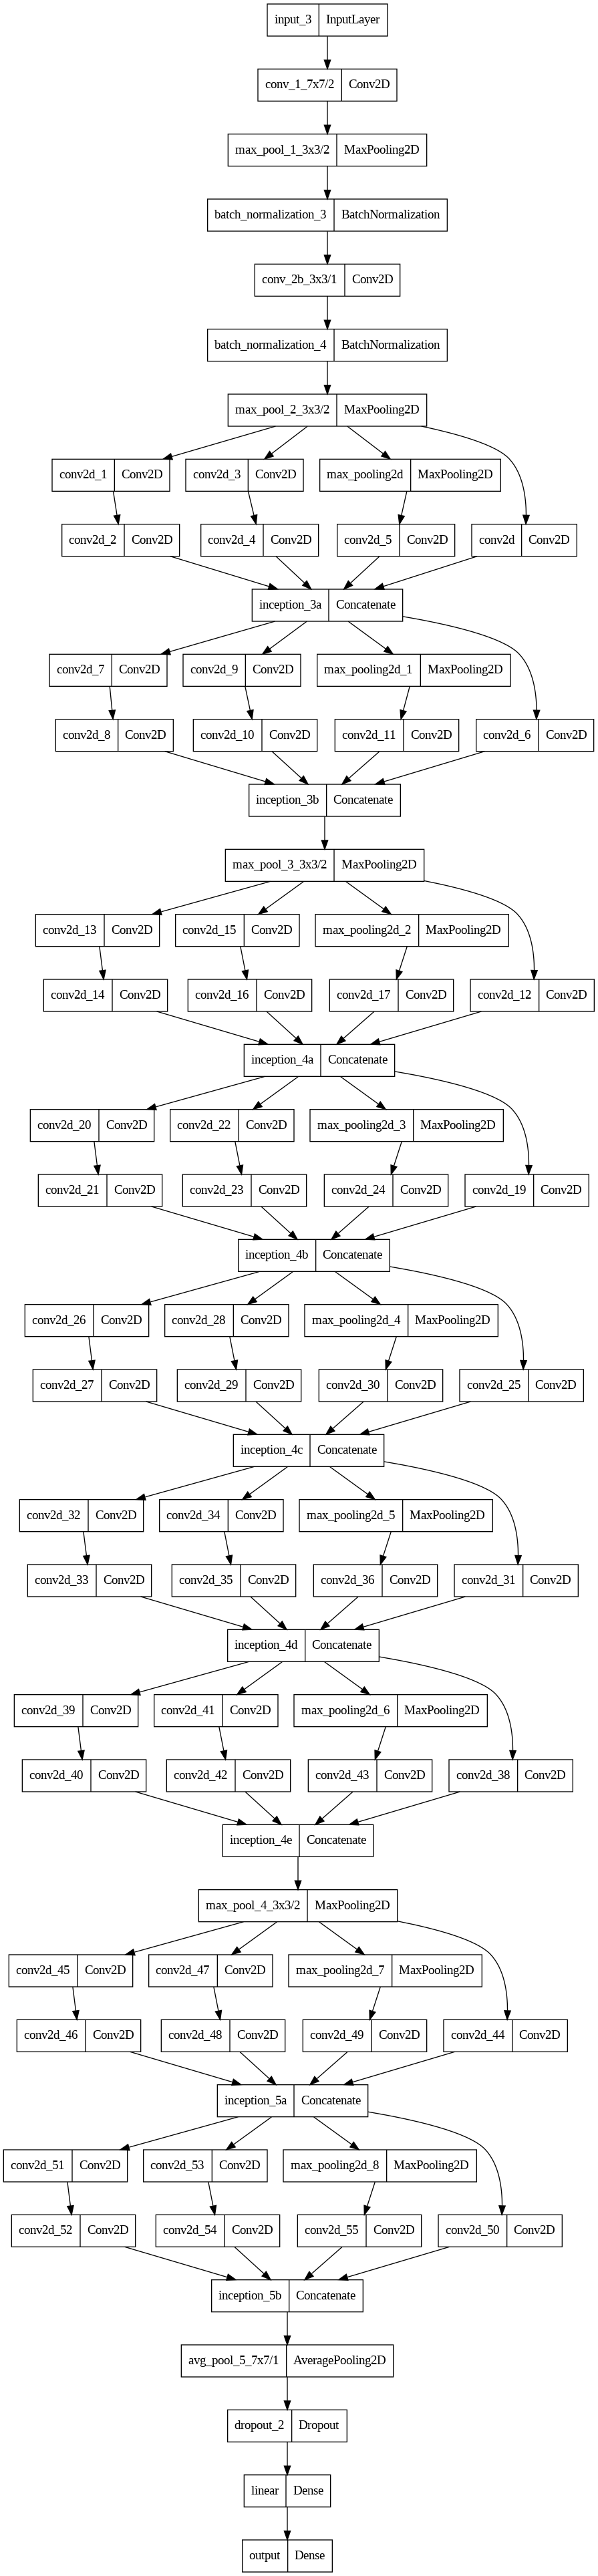

In [13]:
plot_model(model_1)

### b) GoogLeNet with auxilliary classifiers

Auxiliary Classifiers are type of architectural component that seek to improve the convergence of very deep networks. They are classifier heads we attach to layers before the end of the network. The motivation is to push useful gradients to the lower layers to make them immediately useful and improve the convergence during training by combatting the vanishing gradient problem. They are notably used in the Inception family of convolutional neural networks.

In [14]:
model_2 = Model(input_layer, [x, classifier_1, classifier_2], name='completed_googlenet')
model_2.summary()

Model: "completed_googlenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv_1_7x7/2 (Conv2D)       (None, 112, 112, 64)         9472      ['input_3[0][0]']             
                                                                                                  
 max_pool_1_3x3/2 (MaxPooli  (None, 56, 56, 64)           0         ['conv_1_7x7/2[0][0]']        
 ng2D)                                                                                            
                                                                                                  
 batch_normalization_3 (Bat  (None, 56, 56, 64)           256       ['max_pool_1

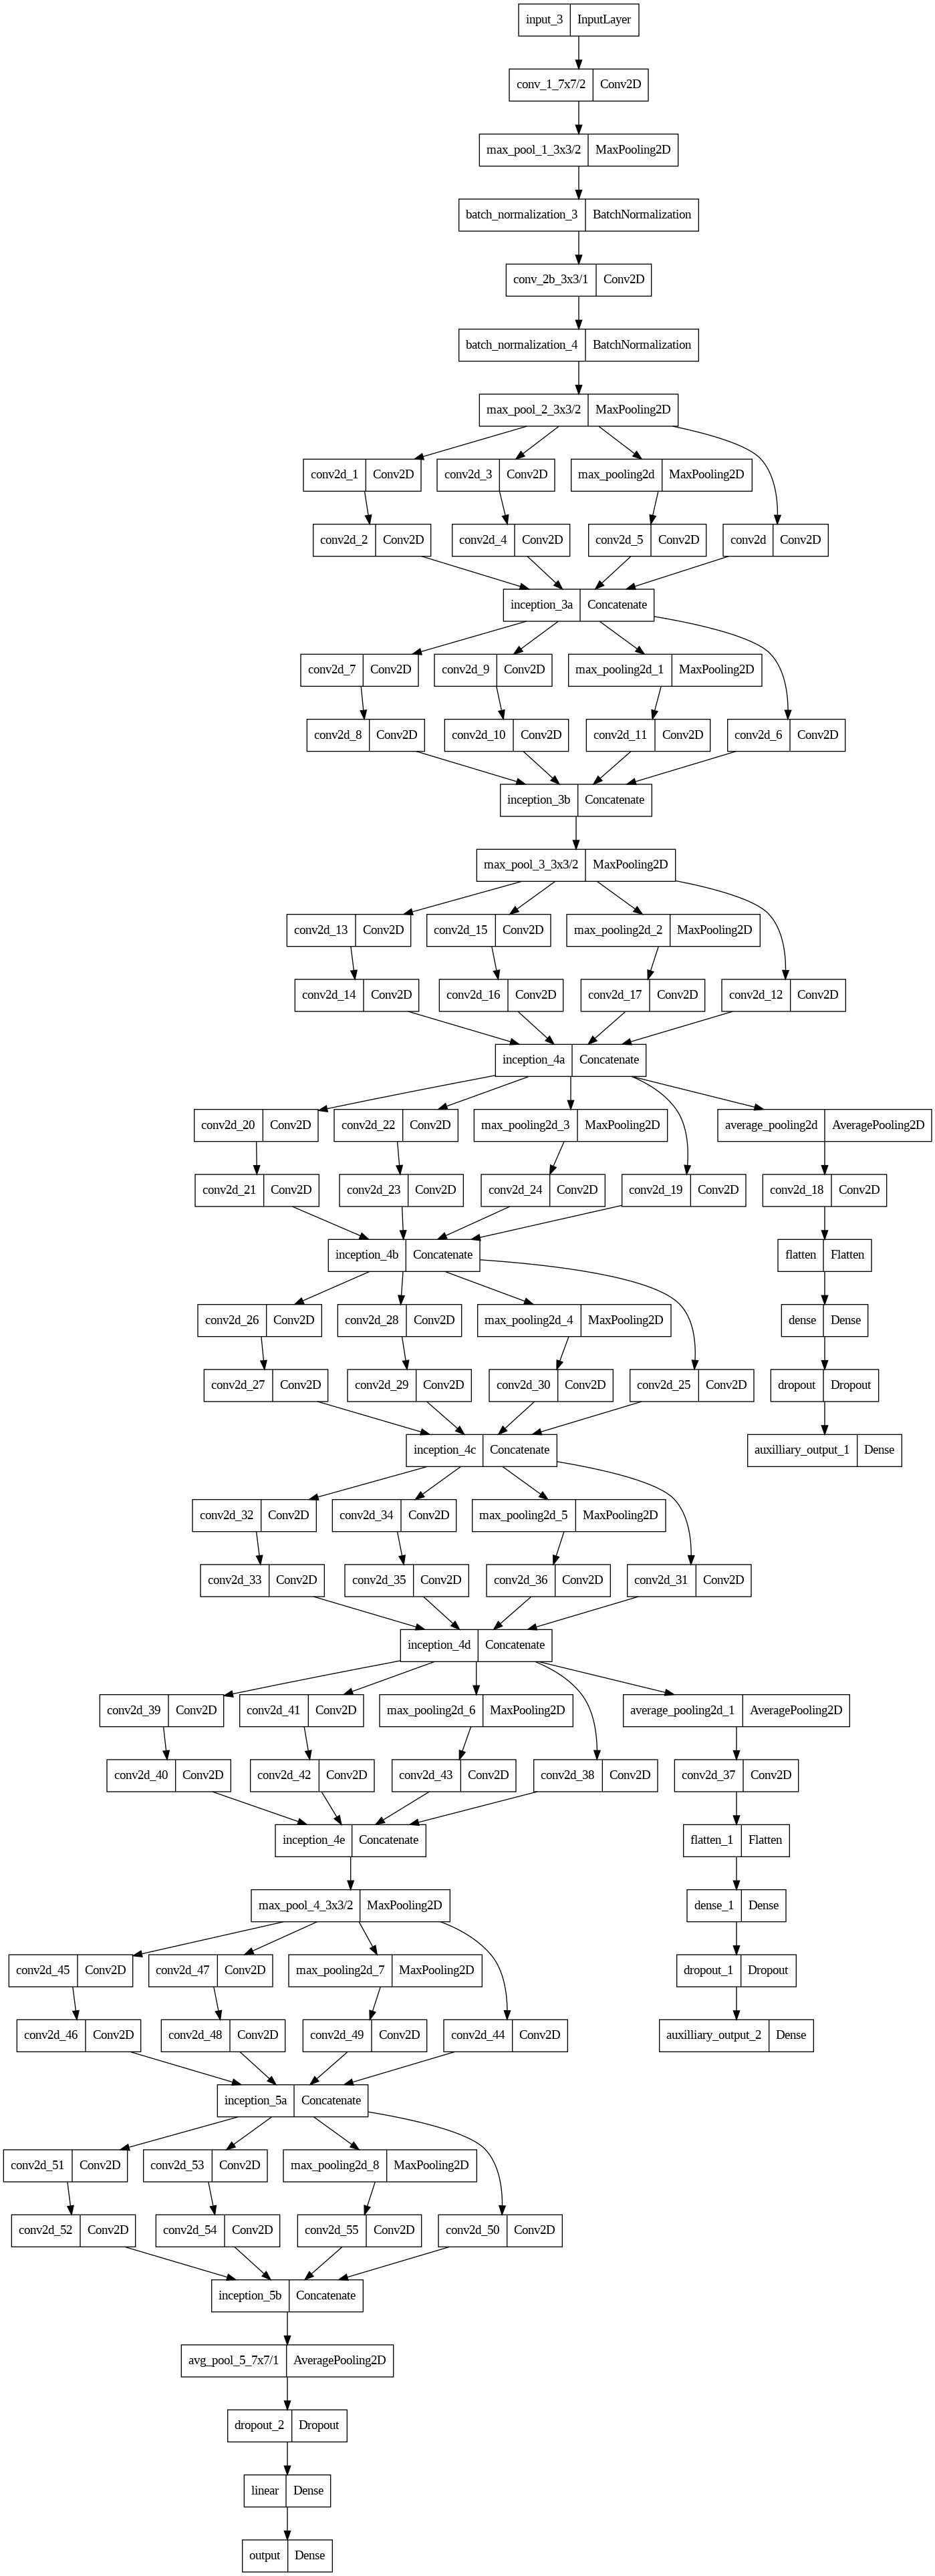

In [15]:
plot_model(model_2)